## Polytope On-Demand Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this.

In [2]:
from polytope.api import Client

polytope_address="polytope.lumi.apps.dte.destination-earth.eu"
client = Client(address=polytope_address)

## Data request

As for the global Extremes-DT output data is requested using the MARS language. The big difference here is that we have a new domain for every run which is done through the `georef` key, see below.

In [ ]:
import earthkit.data

request = {
    'class': 'd1',
    'dataset': 'on-demand-extremes-dt',
    'expver': '0099',
    'stream': 'oper',
    'date': '20250616',
    'time': 0,
    'type': 'fc',
    'levtype': 'sfc',
    'georef': 'u4usq2',
    'step': 12,
    'param': 167
}
data = earthkit.data.from_source("polytope", "destination-earth", request, address=polytope_address, stream=False)

## Data inspection

We can list the data using the `ls` method. Here we see e.g. that we run the model in the `lambert_lam` projection.

In [4]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20250616,0,12,fc,None,lambert_lam


## Plotting

Finally we create plot of the data retrieved using earthkit-plots.

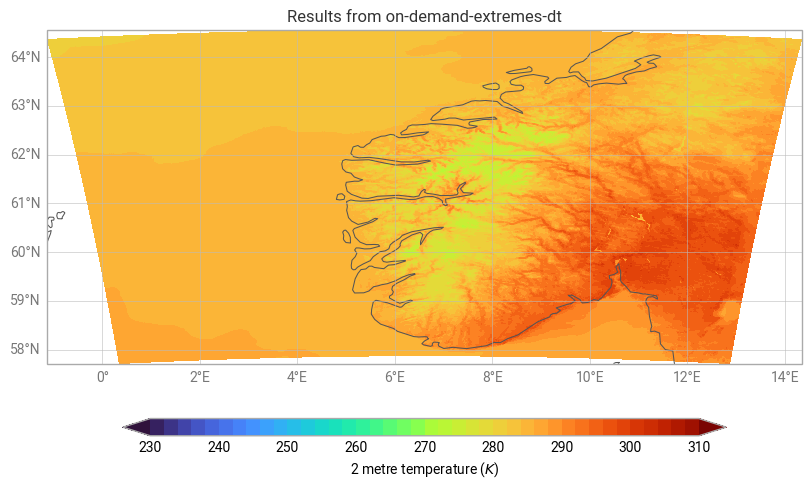

In [5]:
import earthkit.plots
chart = earthkit.plots.Map()
chart.quickplot(data)
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.show()